   # Principle Component Analysis  Using MNIST Data Set

 

### Principal Component Analysis, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

###           Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without irrelavent variables to process.

In [77]:
# Required Libraries 
import pandas as pd
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Read the Dataset using Pandas
mnist_dataset = pd.read_csv('train.csv')

# # save the labels into a variable mnist_label
mnist_label = mnist_dataset['label']

# Drop the label feature and store the pixel data inmnist_data
mnist_data = mnist_dataset.drop("label",axis=1)
mnist_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Totally 42000 records and 784 attriutes(pixels) are there in the dataset, total 42,000 records are make larger time to computation, so for reduce process time i take only first 20,000 records for the furthere process

In [79]:
# Take only first 20,000 values of data set to reduce the processing time
mnist_data = mnist_data.iloc[:20000]
mnist_label = mnist_label.iloc[:20000]

In [80]:
# check the shape of dataset
print(mnist_data.shape)
print(mnist_label.shape)

(20000, 784)
(20000,)


            Steps Followed by Calculate Principle Components
            
1. Step-1: Calculate the covariance matrix of mnist_data,
2. step-2: calculate the eigenvalues and eigenvectors of the covariance matrix calculated from step-1
3. step-3: take top-k eigenvalues, i.e, k = no.of components we need

In [81]:
# calculate co-variance matrix of mnist_dataset
covar_matrix = np.matmul(mnist_data.T , mnist_data)

In [82]:
# calculate eigen_values and eigen_vectors
values, vectors = eigh(covar_matrix)

Note: numpy "eigh" function returs the eigenvalues in ascending order, so last two values are larger eigen values, so i take K=2, which is higest 2 eigen values in calculated array

In [83]:
# take top 2 eigenvalues and eigenvectors
eig_val = values[-2:]
# converting the eigen vectors into (2,784) shape for further computations
eig_vec = vectors.T[-2:]

After having the principal components, to compute the percentage of variance (information) accounted for by each component

In [84]:
sum_eig_val = np.sum(eig_val)
pc1_variance_info = (eig_val[1]/sum_eig_val)*100
pc2_variance_info = (eig_val[0]/sum_eig_val)*100
print("Principle component-1 carry", pc1_variance_info,"% of the Variance")
print("Principle component-2 carry", pc2_variance_info,"% of the Variance")

Principle component-1 carry 89.84573924466753 % of the Variance
Principle component-2 carry 10.154260755332468 % of the Variance


In [85]:
# Recast the Data along the Principle componenet axes
new_axes = np.matmul(eig_vec, mnist_data.T)

In [86]:
print (" resultanat new data points' shape ", eig_vec.shape, "X", mnist_data.T.shape," = ", new_axes.shape)

 resultanat new data points' shape  (2, 784) X (784, 20000)  =  (2, 20000)


In [87]:
# by using vstack function, stack the array of newdatapoints and labels
new_axes = np.vstack((new_axes, mnist_label)).T

In [88]:
# create PCA dataframe with 2 Priciple components and labels
pca_data = pd.DataFrame(data=new_axes, columns=("pc_1", "pc_2", "mnist_label"))
print(pca_data.head())

          pc_1         pc_2  mnist_label
0   482.799724  -939.846106          1.0
1 -1605.469147 -2212.059464          0.0
2   675.602089  -929.585757          1.0
3  -278.995226  -707.780993          4.0
4 -1818.029287 -2319.440710          0.0


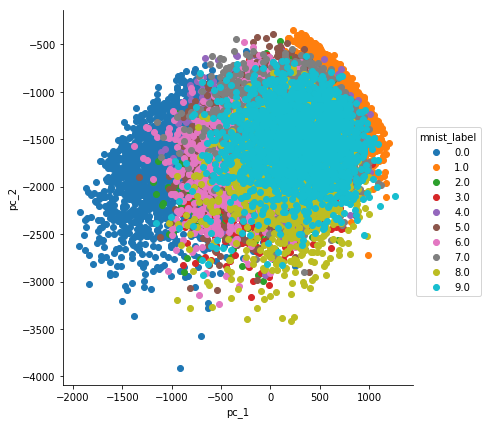

In [89]:
# 
sns.FacetGrid(pca_data, hue="mnist_label", size=6).map(plt.scatter, "pc_1", "pc_2").add_legend()
plt.show()

In Mnist Dataset has totally 10 labels, and PCA overlaps the labels, anyway PCA is not applicable for all Datasets, for the sake of explaining PCA, I would like to do same operations with only 2 labels, 

Let we See !!!

In [90]:

# I take only label-0 and label-1
label_0_df = mnist_dataset[mnist_dataset['label']== 0]
label_1_df = mnist_dataset[mnist_dataset['label']== 1]
reduced_label_data = label_0_df.append(label_1_df)


# shuffle the appended data (usally for train the model, not needed here but for understanding)
reduced_label_data = reduced_label_data.sample(n=len(reduced_label_data), random_state=42)

reduced_label = reduced_label_data['label']
reduced_data= reduced_label_data.drop("label",axis=1)
reduced_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
covar_matrix_reduced_data = np.matmul(reduced_data.T , reduced_data)
values_sample, vectors_sample = eigh(covar_matrix_reduced_data)
eig_val_sample = values_sample[-2:]
eig_vec_sample = vectors_sample.T[-2:]

In [92]:
new_axes_sample = np.matmul(eig_vec_sample, reduced_data.T)
new_axes_sample = np.vstack((new_axes_sample, reduced_label)).T
pca_data_sample = pd.DataFrame(data=new_axes_sample, columns=("pc_1", "pc_2", "label"))
print(pca_data_sample.head())

          pc_1         pc_2  label
0   536.158305  1842.307969    0.0
1  -528.699781   774.544114    1.0
2   573.815714  2011.246536    0.0
3 -1144.750836   903.423389    1.0
4  -709.680979   560.844116    1.0


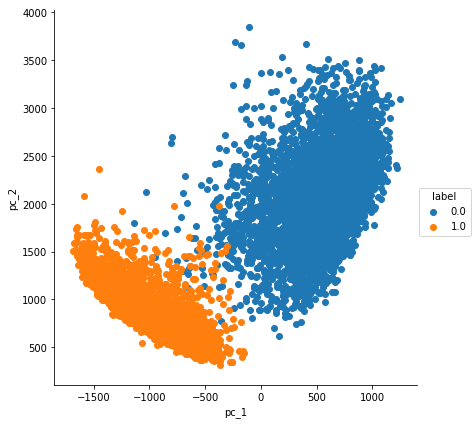

In [93]:
sns.FacetGrid(pca_data_sample, hue="label", size=6).map(plt.scatter, "pc_1", "pc_2").add_legend()
plt.show()

So, Here we clearly see the two labels are seperated clearly with only two dimensions(i.e, Two components), so i conclude that tha pca algorithms are mostly used to reduce the dimensonlity of the dataset, but the problem is for larger amount of data with multiple classes, we need some extra components(i.e, here we use 2 components), may be if we increase number of components then we can able to get some clear results,

#####  Thank You 